In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.shape

(1470, 35)

In [3]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [4]:
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1)
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [6]:
cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [7]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)


In [10]:
dt_model = DecisionTreeClassifier( criterion='entropy', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [11]:
y_pred_dt = dt_model.predict(X_test)

In [12]:
print('Accuracy:', accuracy_score(y_test, y_pred_dt))

Accuracy: 0.7959183673469388


In [15]:
print('Classification Report:\n ',classification_report(y_test, y_pred_dt))


Classification Report:
                precision    recall  f1-score   support

           0       0.87      0.89      0.88       247
           1       0.35      0.32      0.33        47

    accuracy                           0.80       294
   macro avg       0.61      0.60      0.61       294
weighted avg       0.79      0.80      0.79       294



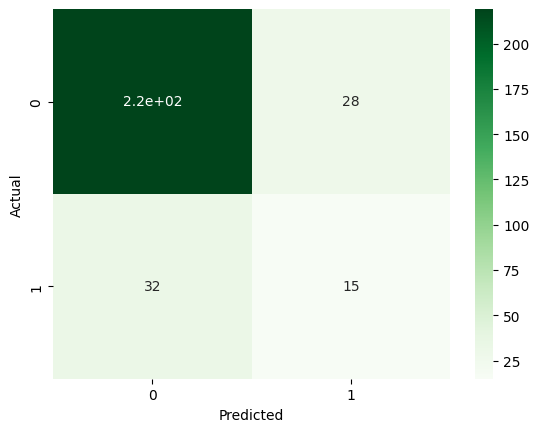

In [16]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

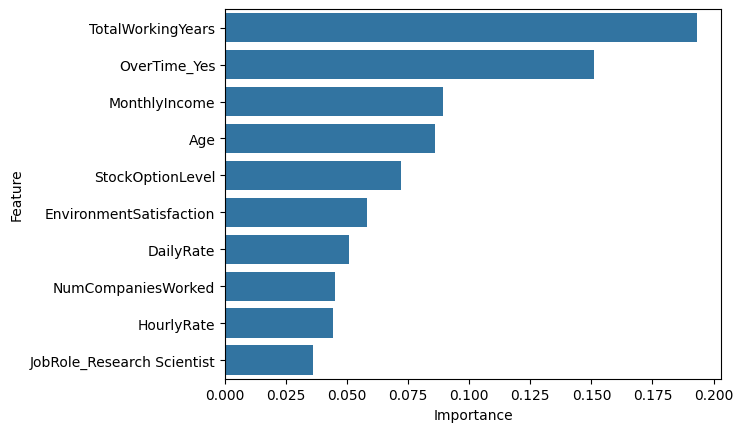

In [17]:
feat_imp_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance':dt_model.feature_importances_
}).sort_values(by='Importance',ascending=False)
sns.barplot(x='Importance', y='Feature',
            data=feat_imp_dt.head(10))
plt.show()

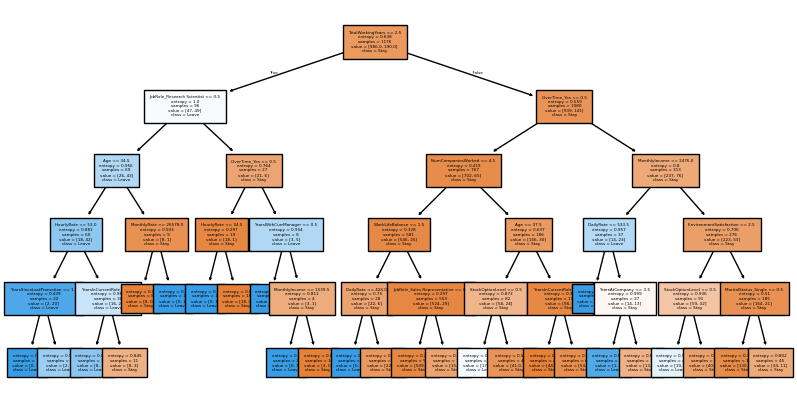

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(dt_model, filled=True, feature_names=X.columns,
          class_names=['Stay','Leave'], fontsize=3)
plt.show()

In [26]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1, #utilize all CPU Cores
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [27]:
y_pred_rf = rf_model.predict(X_test)


In [28]:
print('Clasification report:\n', classification_report(y_test, y_pred_rf))


Clasification report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.44      0.09      0.14        47

    accuracy                           0.84       294
   macro avg       0.65      0.53      0.53       294
weighted avg       0.78      0.84      0.79       294



In [29]:
#Apply SVM on the dataset above